# OptiML Data Pre-Processing & Analysis Notebook
Contains [Spotify Tracks](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset), [Road Accident Survival](https://www.kaggle.com/datasets/himelsarder/road-accident-survival-dataset), [Apple Quality](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality), and [Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) datasets.

In [2]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 

## Spotify Tracks Dataset

### Read & Clean Data

In [3]:
spotify_df = pd.read_csv("../data/spotify.csv")
spotify_df.shape
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
spotify_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
spotify_df.dropna(inplace=True)
spotify_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
display(spotify_df.head())

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
print(f"Dataset Shape: {spotify_df.shape}")
print(f"Number of Records: {spotify_df.shape[0]}")
print(f"Number of Features: {spotify_df.shape[1]}")

#Missing values
missing_values = spotify_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0] if len(missing_values[missing_values > 0]) > 0 else "No missing values found")

#Duplicate values
print("\nDuplicate Values:")
duplicates = spotify_df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

#Data types
print("\nData Types:")
print(spotify_df.dtypes)

Dataset Shape: (113999, 21)
Number of Records: 113999
Number of Features: 21

Missing Values:
No missing values found

Duplicate Values:
Number of duplicate records: 0

Data Types:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [8]:
#Statistics for numerical columns
numerical_cols = spotify_df.select_dtypes(include=['int64', 'float64']).columns
spotify_df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,113999.0,56999.421925,32909.243463,0.000,28499.5000,56999.000000,85499.5000,113999.000
popularity,113999.0,33.238827,22.304959,0.000,17.0000,35.000000,50.0000,100.000
duration_ms,113999.0,228031.153387,107296.057716,8586.000,174066.0000,212906.000000,261506.0000,5237295.000
danceability,113999.0,0.566801,0.173543,0.000,0.4560,0.580000,0.6950,0.985
energy,113999.0,0.641383,0.251530,0.000,0.4720,0.685000,0.8540,1.000
key,113999.0,5.309126,3.559999,0.000,2.0000,5.000000,8.0000,11.000
loudness,113999.0,-8.258950,5.029357,-49.531,-10.0130,-7.004000,-5.0030,4.532
mode,113999.0,0.637558,0.480708,0.000,0.0000,1.000000,1.0000,1.000
speechiness,113999.0,0.084652,0.105733,0.000,0.0359,0.048900,0.0845,0.965
acousticness,113999.0,0.314907,0.332522,0.000,0.0169,0.169000,0.5975,0.996


In [9]:
print("Number of tracks per genre:")
genre_counts = spotify_df['track_genre'].value_counts()
print(genre_counts)

Number of tracks per genre:
track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
turkish        1000
trip-hop       1000
world-music    1000
k-pop           999
Name: count, Length: 114, dtype: int64


### Visualization

- explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration


Explicit statistics:
Mean: 0.0855
Median: 0.0000
Standard deviation: 0.2796
Min: 0.0000
Max: 1.0000

Danceability statistics:
Mean: 0.5668
Median: 0.5800
Standard deviation: 0.1735
Min: 0.0000
Max: 0.9850

Energy statistics:
Mean: 0.6414
Median: 0.6850
Standard deviation: 0.2515
Min: 0.0000
Max: 1.0000

Speechiness statistics:
Mean: 0.0847
Median: 0.0489
Standard deviation: 0.1057
Min: 0.0000
Max: 0.9650

Acousticness statistics:
Mean: 0.3149
Median: 0.1690
Standard deviation: 0.3325
Min: 0.0000
Max: 0.9960

Instrumentalness statistics:
Mean: 0.1561
Median: 0.0000
Standard deviation: 0.3096
Min: 0.0000
Max: 1.0000

Liveness statistics:
Mean: 0.2136
Median: 0.1320
Standard deviation: 0.1904
Min: 0.0000
Max: 1.0000

Valence statistics:
Mean: 0.4741
Median: 0.4640
Standard deviation: 0.2593
Min: 0.0000
Max: 0.9950

Tempo statistics:
Mean: 122.1477
Median: 122.0170
Standard deviation: 29.9783
Min: 0.0000
Max: 243.3720


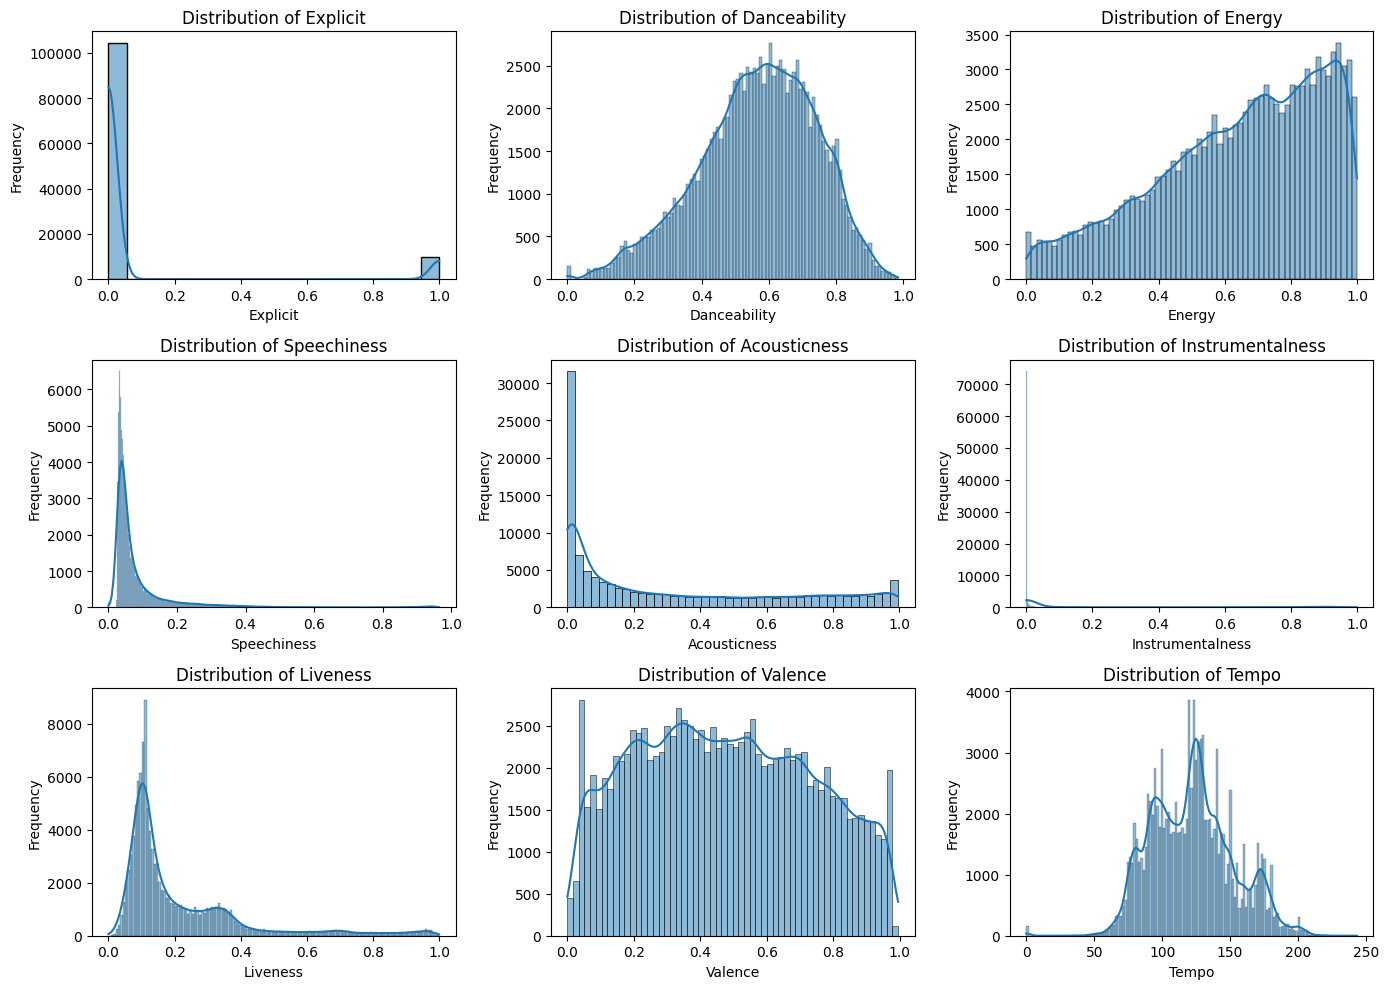

In [10]:
audio_features = ['explicit', 'danceability', 'energy', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for feature in audio_features:
    print(f"\n{feature.capitalize()} statistics:")
    print(f"Mean: {spotify_df[feature].mean():.4f}")
    print(f"Median: {spotify_df[feature].median():.4f}")
    print(f"Standard deviation: {spotify_df[feature].std():.4f}")
    print(f"Min: {spotify_df[feature].min():.4f}")
    print(f"Max: {spotify_df[feature].max():.4f}")


plt.figure(figsize=(14, 10))
for i, feature in enumerate(audio_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(spotify_df[feature], kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

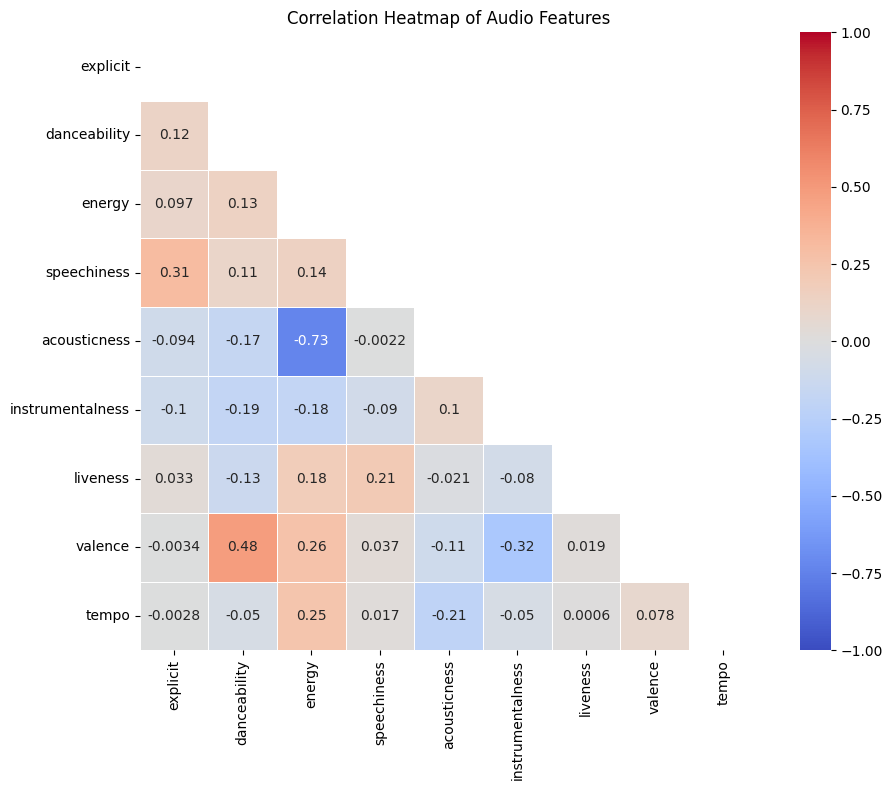

In [11]:
audio_features = ['explicit', 'danceability', 'energy', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

numerical_corr = spotify_df[audio_features].corr()

# Plot correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(numerical_corr, dtype=bool))
sns.heatmap(numerical_corr, mask=mask, annot=True, cmap='coolwarm', 
           vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.show()

### Output Clean Data

In [12]:
spotify_df.to_csv('../data/spotify_clean.csv', index=False)

## Road Accident Survival Dataset

### Read & Clean Data

In [13]:
accident_df = pd.read_csv("../data/accident.csv")
accident_df.shape
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [14]:
accident_df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [15]:
accident_df.dropna(inplace=True)
accident_df.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [16]:
accident_df['Gender'] = accident_df['Gender'].map({'Female':1, 'Male':0})
accident_df['Helmet_Used'] = accident_df['Helmet_Used'].map({'Yes':1, 'No':0})
accident_df['Seatbelt_Used'] = accident_df['Seatbelt_Used'].map({'Yes':1, 'No':0})

accident_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              196 non-null    int64  
 1   Gender           196 non-null    int64  
 2   Speed_of_Impact  196 non-null    float64
 3   Helmet_Used      196 non-null    int64  
 4   Seatbelt_Used    196 non-null    int64  
 5   Survived         196 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.7 KB


In [17]:
display(accident_df.head())

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,1,27.0,0,0,1
1,69,1,46.0,0,1,1
2,46,0,46.0,1,1,0
3,32,0,117.0,0,1,0
4,60,1,40.0,1,1,0


In [18]:
print(f"Dataset Shape: {accident_df.shape}")
print(f"Number of Records: {accident_df.shape[0]}")
print(f"Number of Features: {accident_df.shape[1]}")

#Missing values
missing_values = accident_df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0] if len(missing_values[missing_values > 0]) > 0 else "No missing values found")

#Duplicate values
print("\nDuplicate Values:")
duplicates = accident_df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

#Data types
print("\nData Types:")
print(accident_df.dtypes)

Dataset Shape: (196, 6)
Number of Records: 196
Number of Features: 6

Missing Values:
No missing values found

Duplicate Values:
Number of duplicate records: 0

Data Types:
Age                  int64
Gender               int64
Speed_of_Impact    float64
Helmet_Used          int64
Seatbelt_Used        int64
Survived             int64
dtype: object


In [19]:
#Statistics for numerical columns
numerical_cols = accident_df.select_dtypes(include=['int64', 'float64']).columns
accident_df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,196.0,43.341837,15.004973,18.0,31.0,44.0,56.0,69.0
Gender,196.0,0.556122,0.498113,0.0,0.0,1.0,1.0,1.0
Speed_of_Impact,196.0,70.433673,30.202236,20.0,43.0,71.0,95.5,119.0
Helmet_Used,196.0,0.556122,0.498113,0.0,0.0,1.0,1.0,1.0
Seatbelt_Used,196.0,0.561224,0.497508,0.0,0.0,1.0,1.0,1.0
Survived,196.0,0.510204,0.501176,0.0,0.0,1.0,1.0,1.0


In [20]:
#Distribution of categorical data
categorical_cols = accident_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if accident_df[col].nunique() < 20: 
        print(f"\nDistribution of {col}:")
        print(accident_df[col].value_counts().head(10))
    else:
        print(f"\n{col} has {spotify_df[col].nunique()} unique values - showing top 10:")
        print(spotify_df[col].value_counts().head(10))

### Visualization

<Axes: >

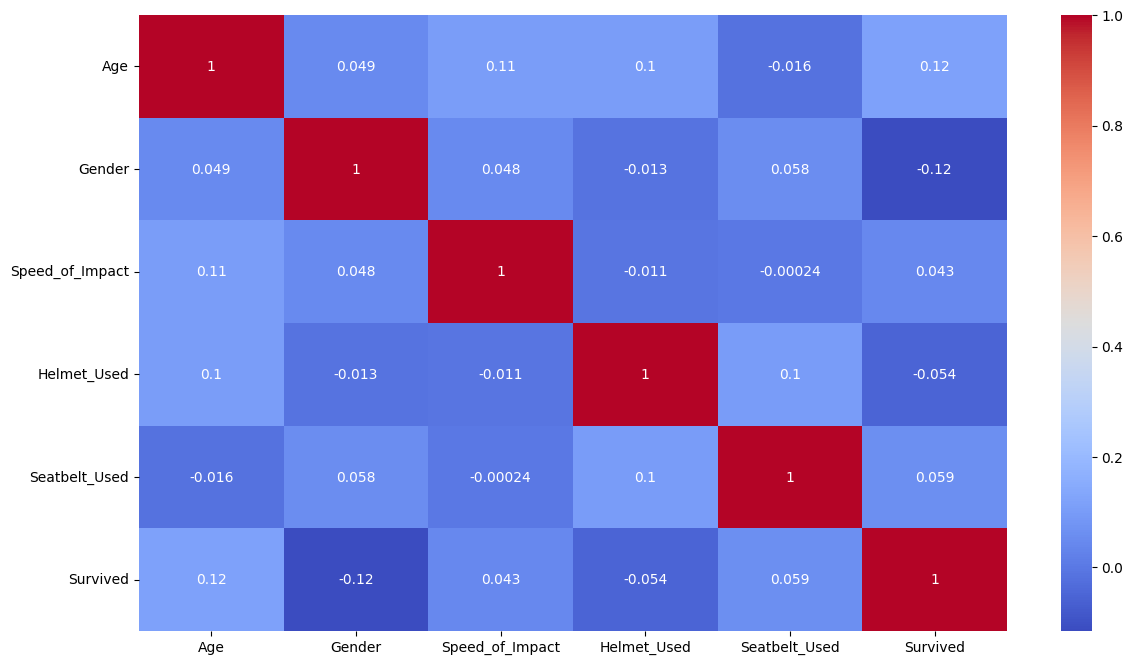

In [21]:
plt.figure(figsize=(14, 8))
sns.heatmap(accident_df.corr(),annot=True,cmap='coolwarm')

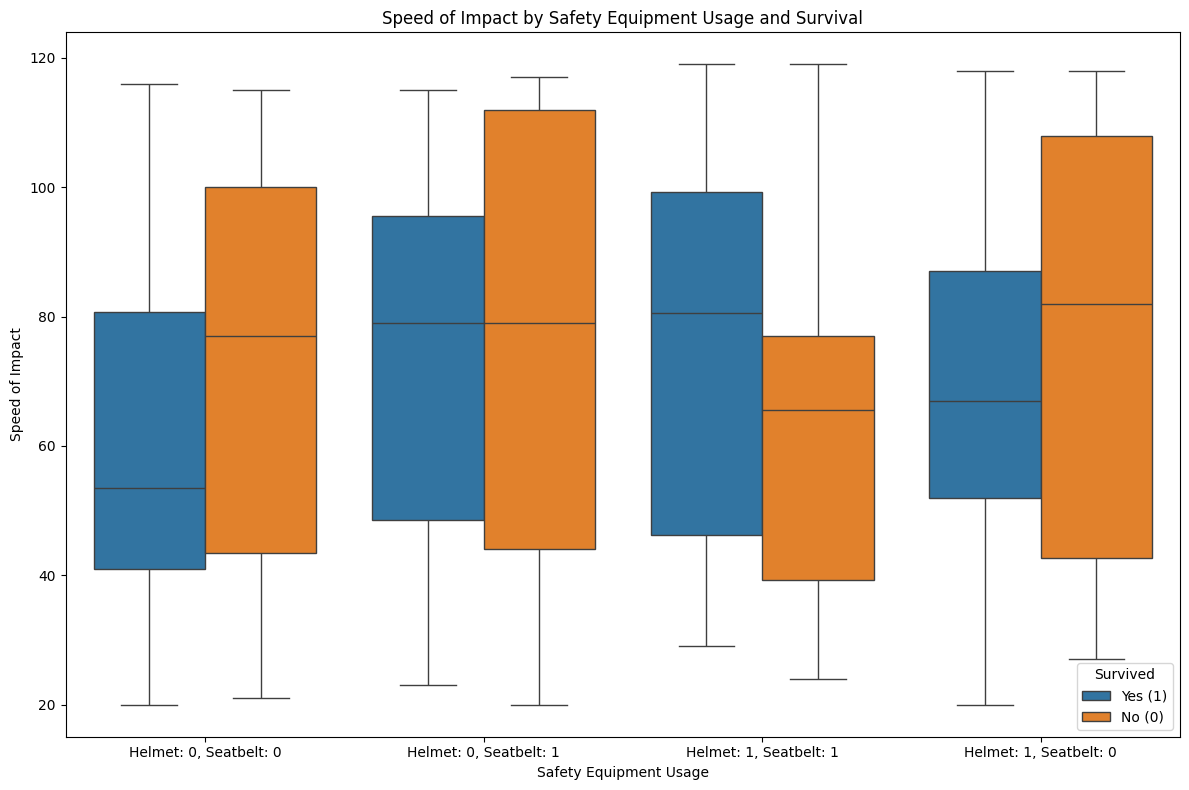

In [22]:
accident_df_copy = accident_df
survival_mapping = {0: "No (0)", 1: "Yes (1)"}
accident_df_copy['Survived_Label'] = accident_df_copy['Survived'].map(survival_mapping)

accident_df_copy['Safety_Equipment'] = accident_df_copy.apply(
    lambda row: f"Helmet: {row['Helmet_Used']}, Seatbelt: {row['Seatbelt_Used']}", 
    axis=1
)

plt.figure(figsize=(12, 8))
sns.boxplot(data=accident_df_copy, x='Safety_Equipment', y='Speed_of_Impact', hue='Survived_Label')
plt.title('Speed of Impact by Safety Equipment Usage and Survival')
plt.xlabel('Safety Equipment Usage')
plt.ylabel('Speed of Impact')
plt.legend(title='Survived')
plt.tight_layout()
plt.show()

### Output Clean Data

In [23]:
accident_df.to_csv('../data/accident_clean.csv', index=False)

## Apple Quality Dataset

### Read & Clean Data

In [24]:
apples = pd.read_csv("../data/apples.csv")
apples.shape
apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [25]:
apples['Acidity'] = pd.to_numeric(apples['Acidity'])
apples['Quality'] = apples['Quality'].map({'good':1, 'bad':0})
apples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


In [26]:
apples.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [27]:
apples.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877,0.501000
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270,0.500062
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538,0.000000
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424,0.000000
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609,1.000000
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736,1.000000


In [28]:
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


### Visualization

#### Before Cleaning

Histogram

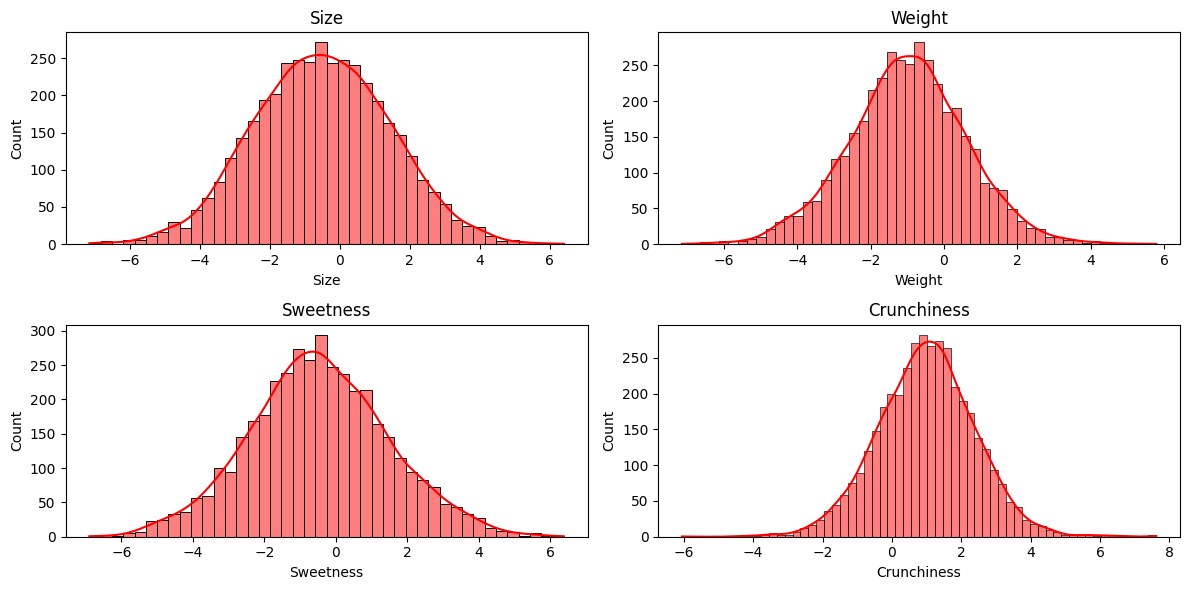

In [29]:
plt.figure(figsize=(12, 6))
#kernel density estimate curve added 
# Size
plt.subplot(2, 2, 1)
sns.histplot(x=apples['Size'], kde=True, color='red')
plt.title('Size')

# Weight
plt.subplot(2, 2, 2)
sns.histplot(x=apples['Weight'], kde=True,color='red')
plt.title('Weight')

# Sweetness
plt.subplot(2, 2, 3)
sns.histplot(x=apples['Sweetness'], kde=True, color='red')
plt.title('Sweetness')

# Crunchiness
plt.subplot(2, 2, 4)
sns.histplot(x=apples['Crunchiness'], kde=True,color='red')
plt.title('Crunchiness')

plt.tight_layout() 
plt.show()

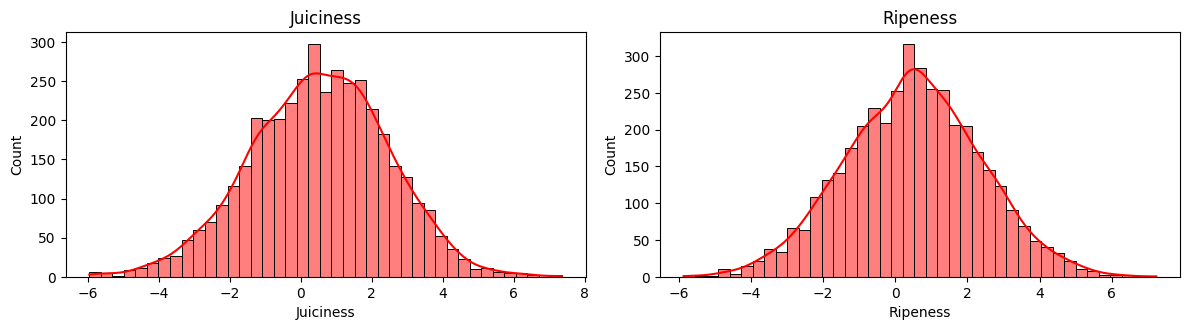

In [30]:
plt.figure(figsize=(12, 6))

# Juiciness
plt.subplot(2, 2, 1)
sns.histplot(x=apples['Juiciness'], kde=True,color='red')
plt.title('Juiciness')

# Ripeness
plt.subplot(2, 2, 2)
sns.histplot(x=apples['Ripeness'], kde=True,color='red')
plt.title('Ripeness')

plt.tight_layout()
plt.show()

Box Plot for Acidity

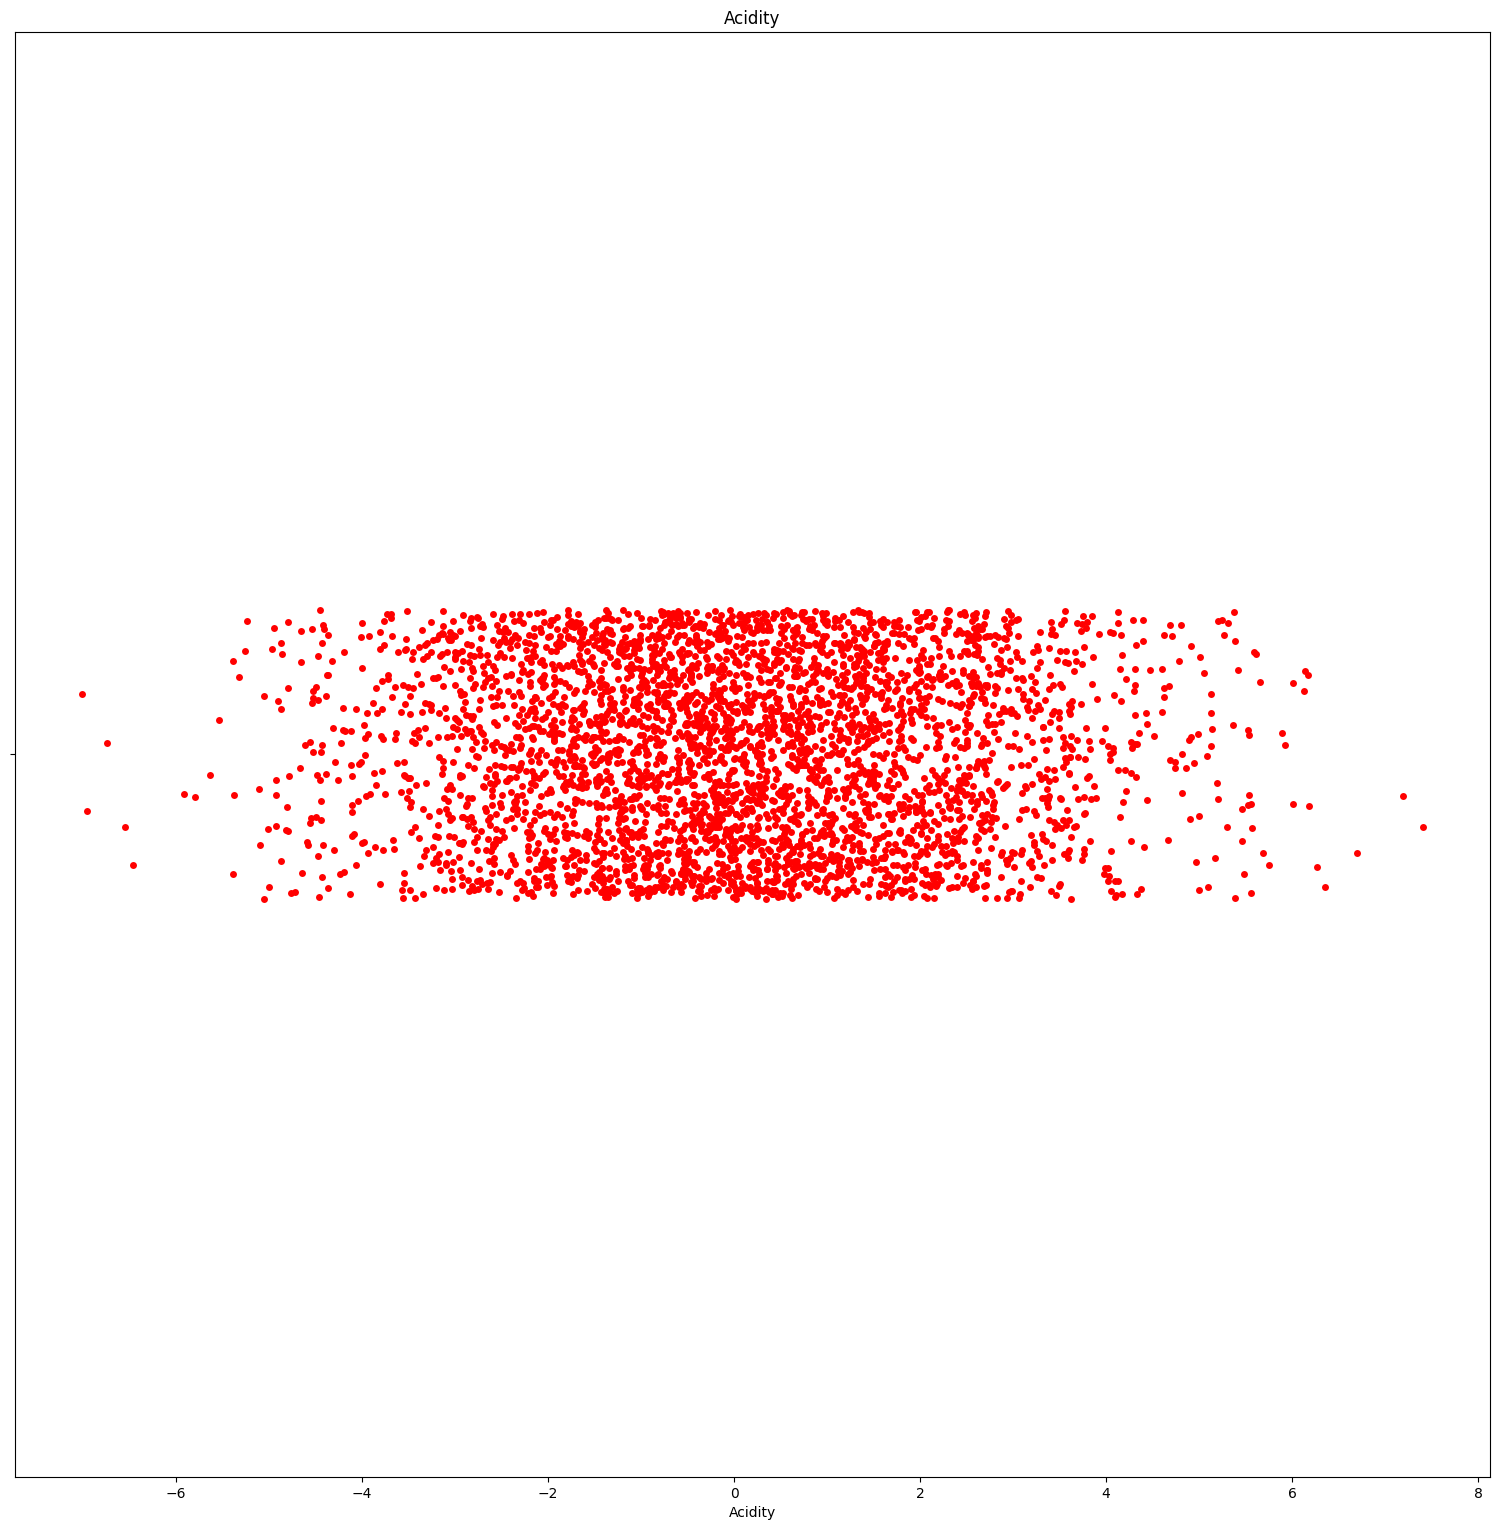

In [31]:
plt.figure(figsize=(30, 30))
plt.subplot(2, 2, 3)
sns.stripplot(x=apples['Acidity'], color='red') 
plt.title('Acidity')
plt.tight_layout()
plt.show()


Correlation Heatmap

<Axes: >

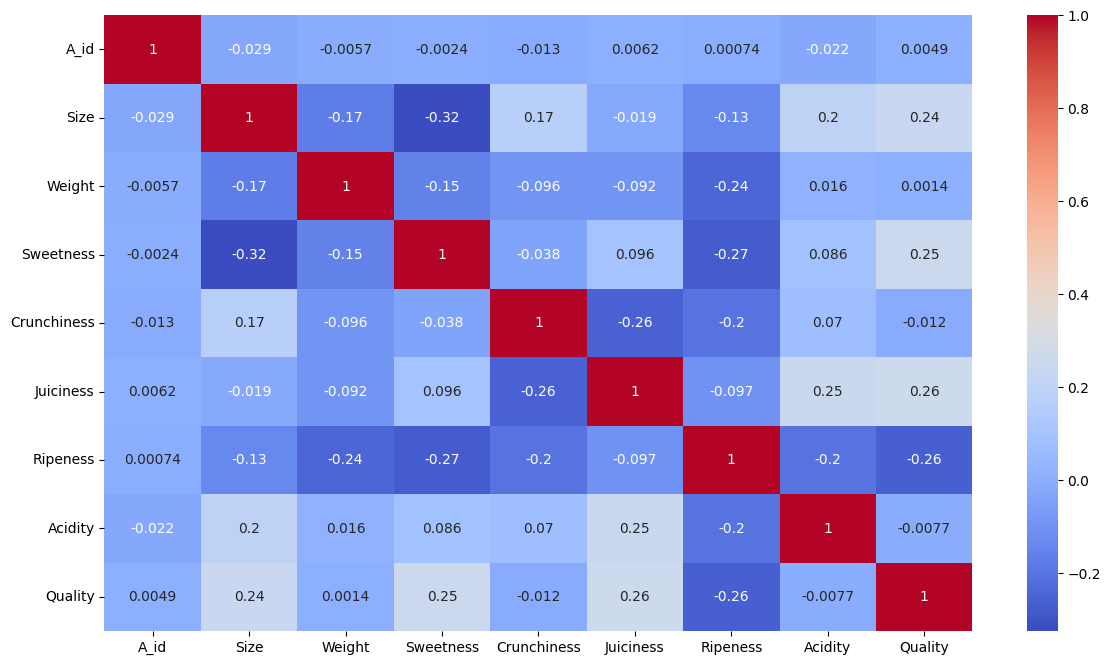

In [32]:
plt.figure(figsize=(14, 8))
sns.heatmap(apples.corr(),annot=True,cmap='coolwarm')

#### Cleaned

In [33]:
Q1 = apples.quantile(0.25)
Q3 = apples.quantile(0.75)
IQR = Q3 - Q1 #interquartile range 

apples_cleaned = apples[
    ((apples >= (Q1 - 1.5 * IQR)) #lowerbound 
      & (apples <= (Q3 + 1.5 * IQR)) #upperbound
      ).all(axis=1)
]
#^ applied to each column 
print(apples_cleaned.shape) 

(3790, 9)


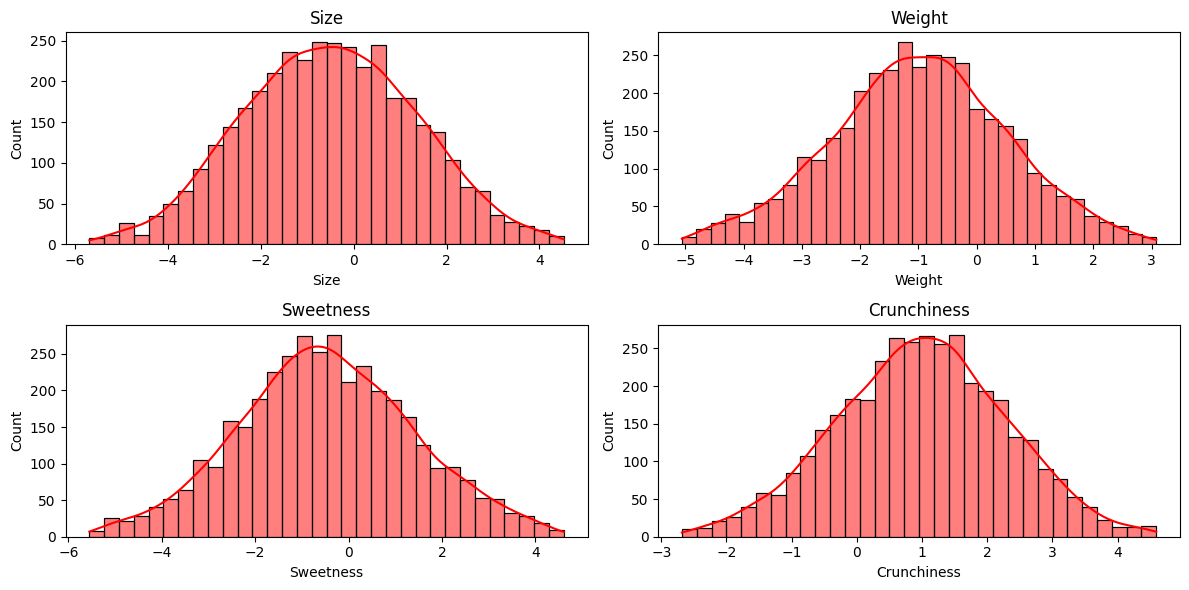

In [34]:
plt.figure(figsize=(12, 6))

# Size
plt.subplot(2, 2, 1)
sns.histplot(x=apples_cleaned['Size'],kde=True,color='red')
plt.title('Size')

# Weight
plt.subplot(2, 2, 2)
sns.histplot(x=apples_cleaned['Weight'],kde=True,color='red')
plt.title('Weight')

# Sweetness
plt.subplot(2, 2, 3)
sns.histplot(x=apples_cleaned['Sweetness'],kde=True,color='red')
plt.title('Sweetness')

# Crunchiness
plt.subplot(2, 2, 4)
sns.histplot(x=apples_cleaned['Crunchiness'], kde=True,color='red')
plt.title('Crunchiness')

plt.tight_layout() 
plt.show()

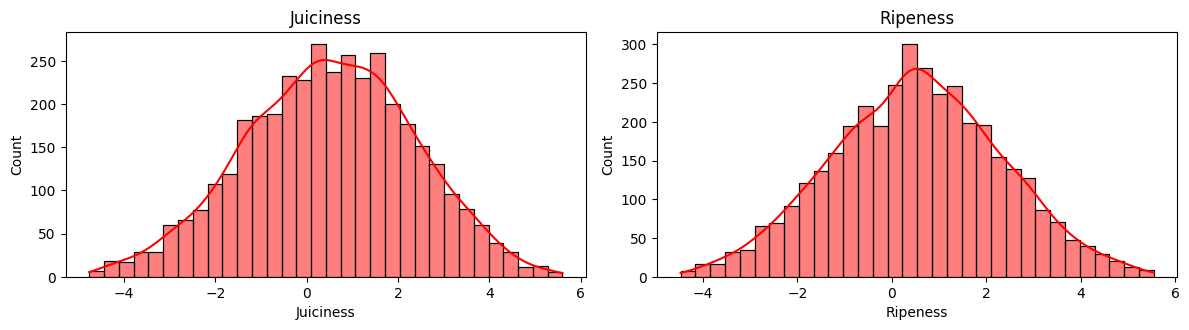

In [35]:
plt.figure(figsize=(12, 6))

# Juiciness
plt.subplot(2, 2, 1)
sns.histplot(x=apples_cleaned['Juiciness'], kde=True,color='red')
plt.title('Juiciness')

# Ripeness
plt.subplot(2, 2, 2)
sns.histplot(x=apples_cleaned['Ripeness'], kde=True,color='red')
plt.title('Ripeness')

plt.tight_layout()
plt.show()

<Axes: >

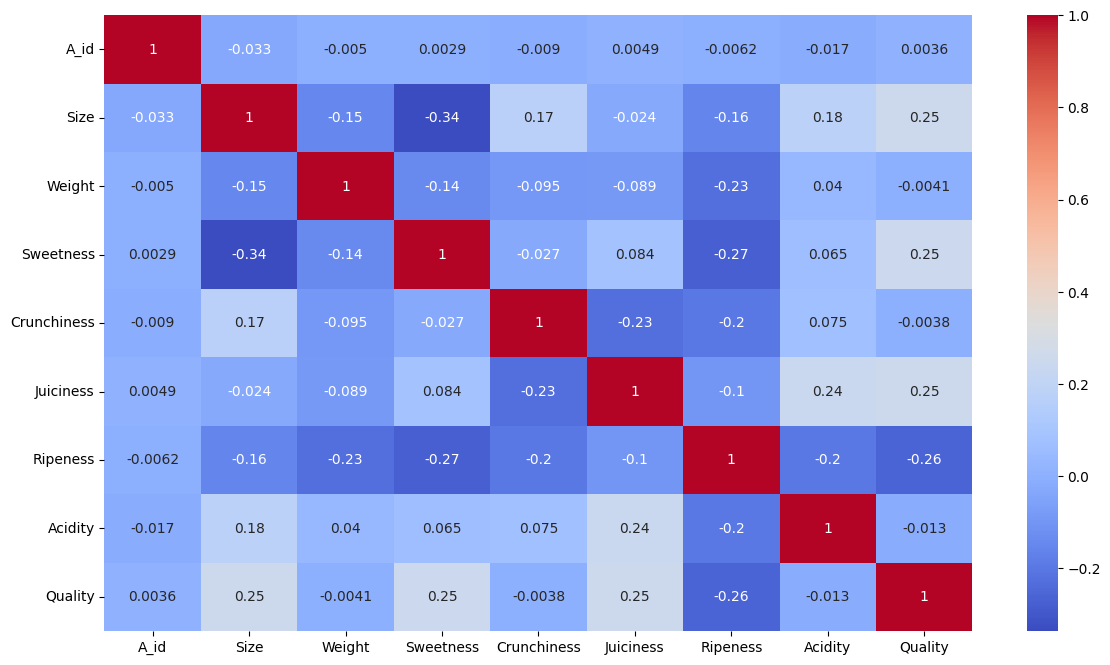

In [36]:
plt.figure(figsize=(14, 8))
sns.heatmap(apples_cleaned.corr(),annot=True,cmap='coolwarm')

### Output Clean Data 

In [37]:
apples.to_csv('../data/apples_clean.csv', index=False)

## Stroke Prediction Dataset

### Read & Clean Data

In [38]:
stroke_data = pd.read_csv("../data/stroke.csv")
stroke_data.shape
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [39]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [40]:
stroke_data['bmi'] = stroke_data['bmi'].fillna(round (stroke_data['bmi'].median(), 2)) #calculate median, round to 2 decimal places and fill NA with that value 
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
display(stroke_data.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Visualization

Age

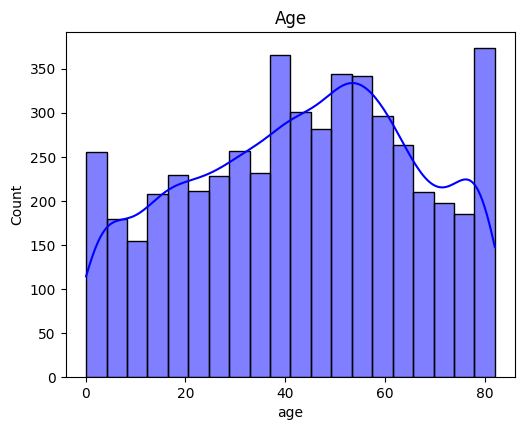

In [42]:
plt.figure(figsize=(10, 8))
#kernel density estimate curve added 

# age 
plt.subplot(2, 2, 1)
sns.histplot(x=stroke_data['age'], kde=True, color='blue')
plt.title('Age')


plt.tight_layout() 
plt.show()

Average glucose level

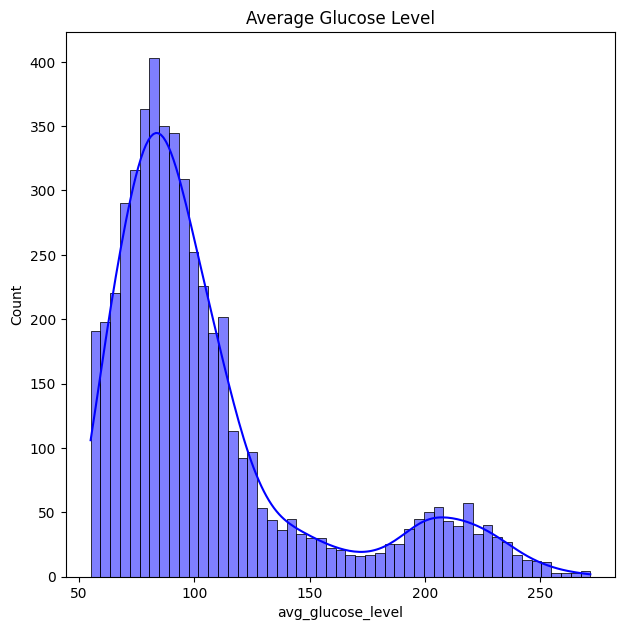

In [43]:
plt.figure(figsize=(12,12))

# Average Glucose Level
plt.subplot(2, 2, 1)
sns.histplot(x=stroke_data['avg_glucose_level'], kde=True,color='blue')
plt.title('Average Glucose Level')
plt.tight_layout() 
plt.show()

Body mass index (BMI)

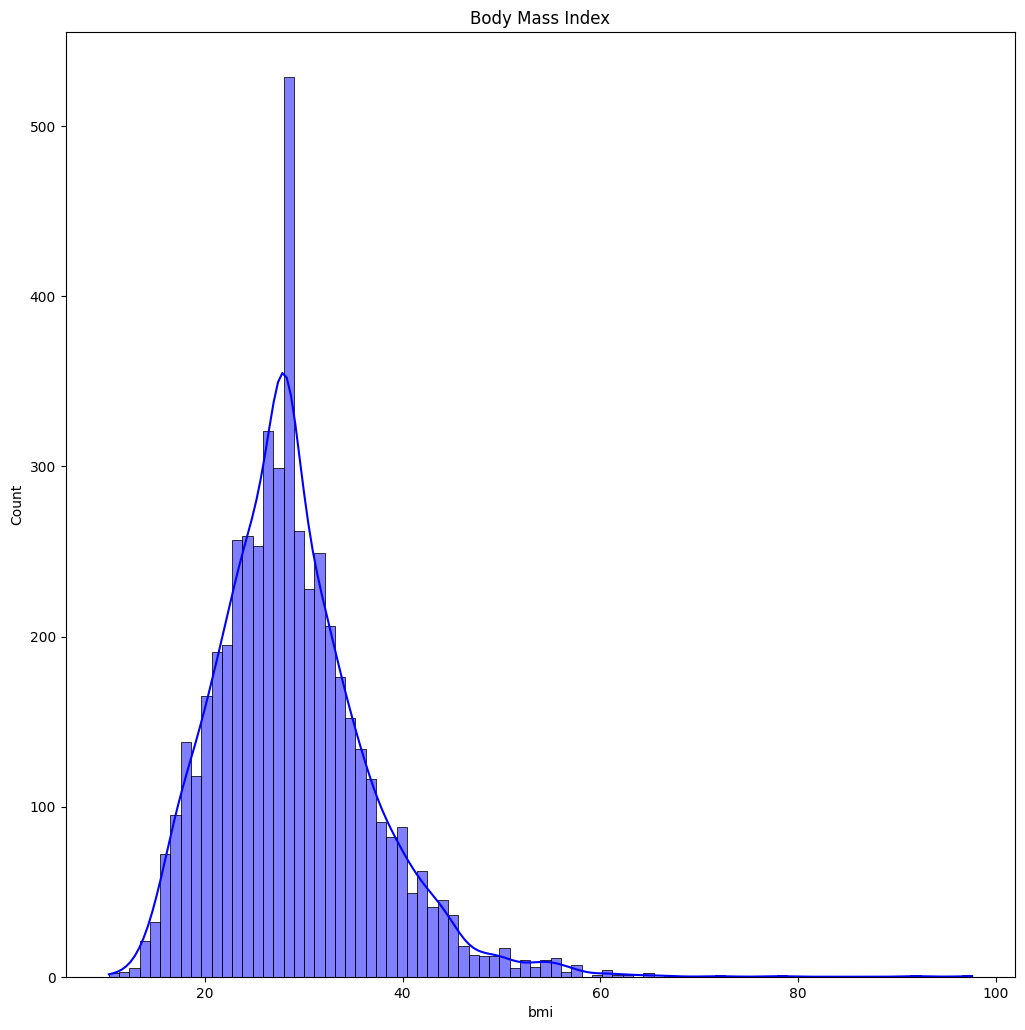

In [44]:
plt.figure(figsize=(20,20))
# bmi
plt.subplot(2, 2, 1)
sns.histplot(x=stroke_data['bmi'], kde=True, color='blue')
plt.title('Body Mass Index')
plt.tight_layout() 
plt.show()

More features
- Gender
- Stroke
- Hypertension
- Ever married
- Work type
- Residence
- Smoking

C:\Users\Sarah\AppData\Local\Temp\ipykernel_1752\2788840743.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stroke_data, x='work_type', palette="Set2")
C:\Users\Sarah\AppData\Local\Temp\ipykernel_1752\2788840743.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stroke_data, x='Residence_type', palette="Set2")
C:\Users\Sarah\AppData\Local\Temp\ipykernel_1752\2788840743.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=stroke_data, x='smoking_status', palette="Set2")


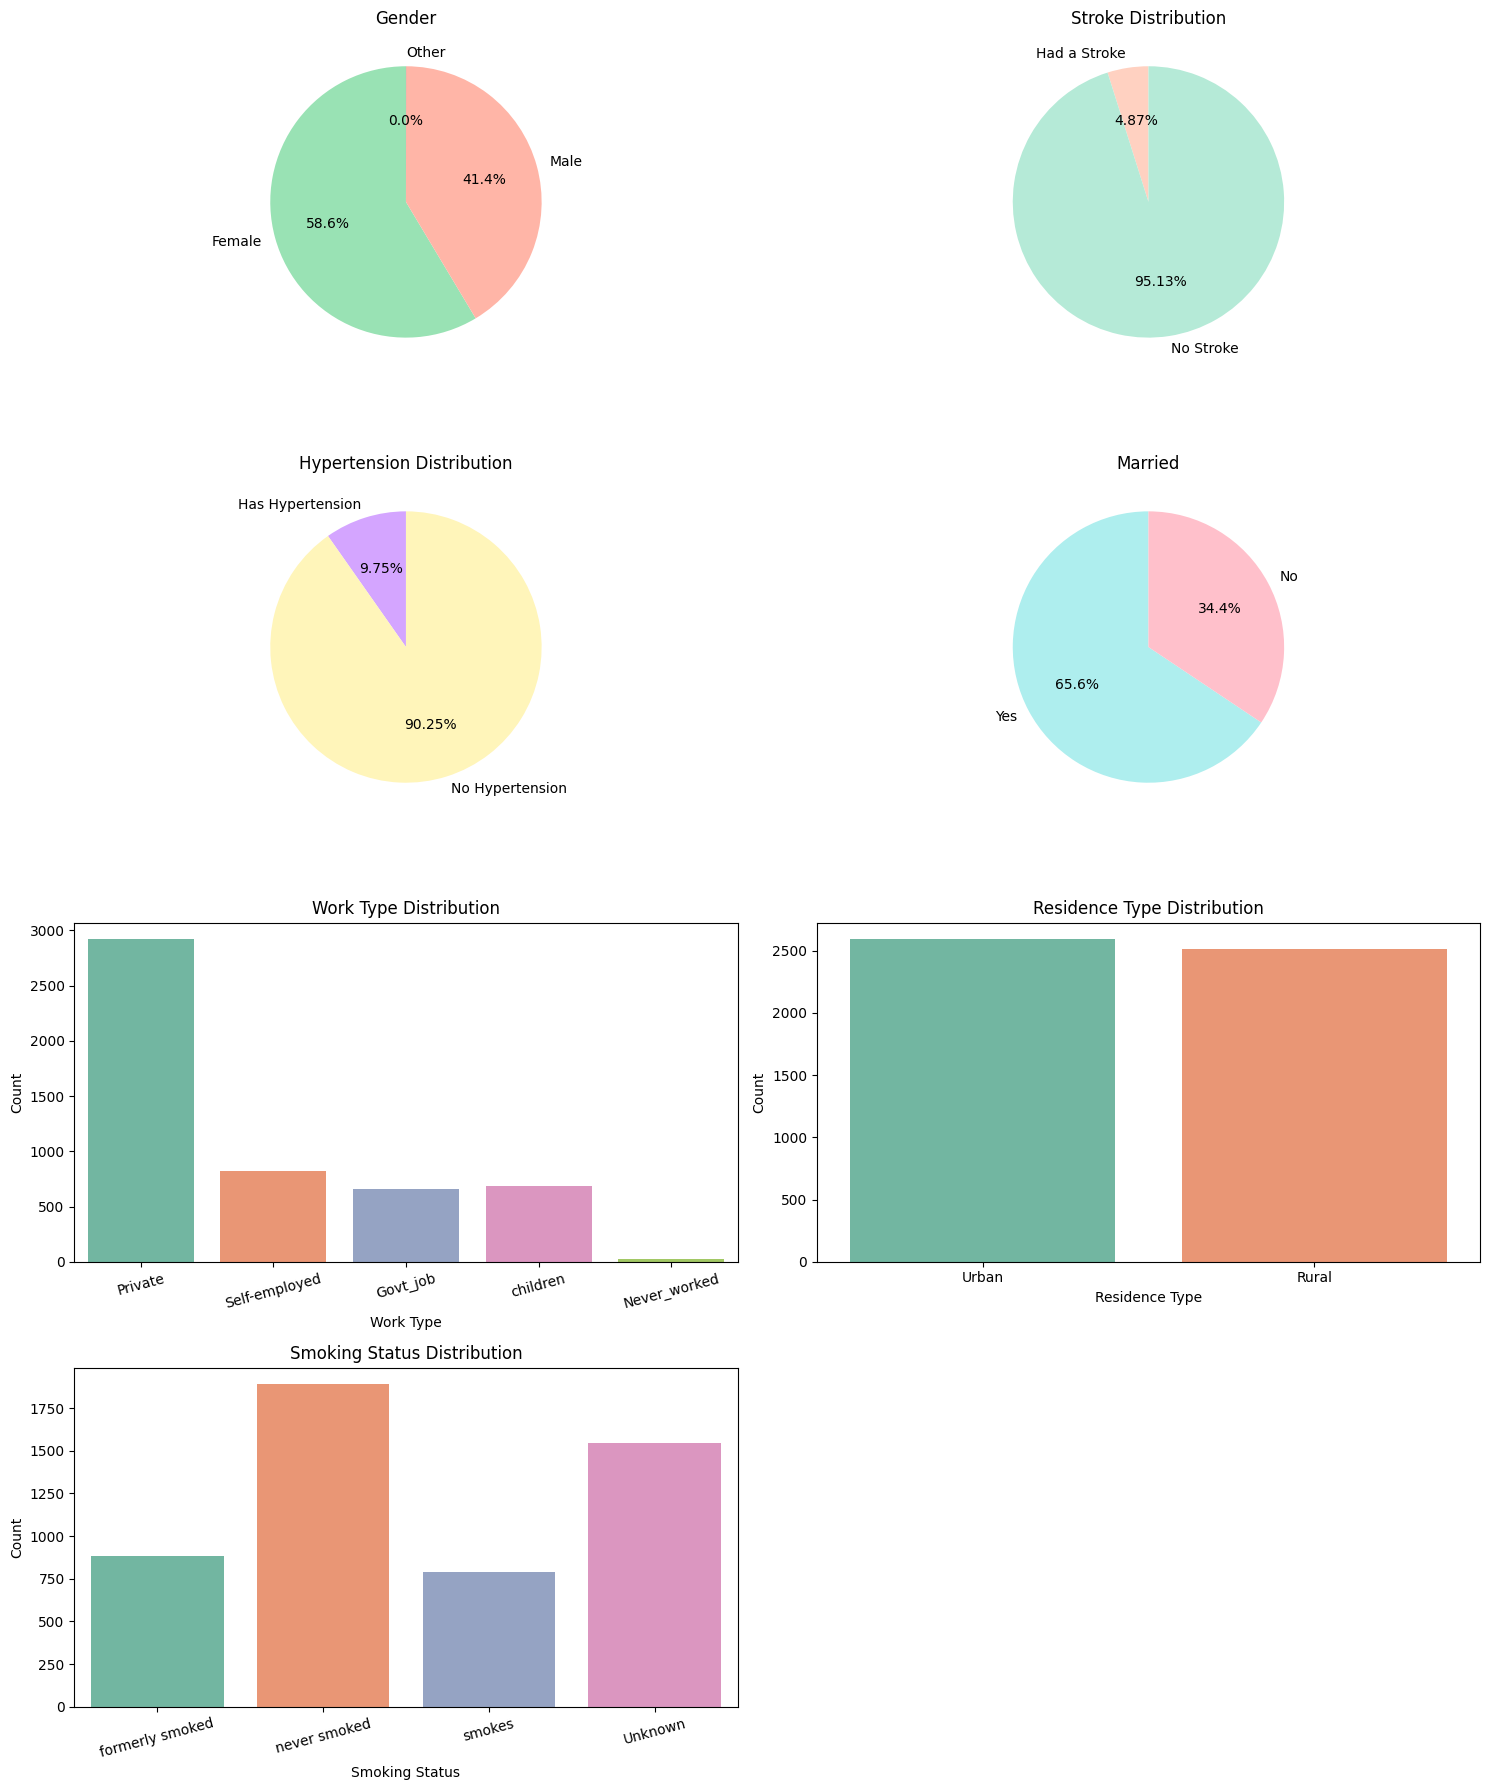

In [45]:

plt.figure(figsize=(15, 18))  # Adjusted for more space

# Gender (Pie Chart)
plt.subplot(4, 2, 1)  
gender_counts = stroke_data['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#99E2B4', '#FFB5A7', 'gray'], startangle=90)
plt.title('Gender')

# Stroke (Pie Chart)
plt.subplot(4, 2, 2)
stroke_counts = stroke_data['stroke'].value_counts()
labels = ['Had a Stroke', 'No Stroke']
sizes = [stroke_counts[1], stroke_counts[0]]  # 1 = stroke, 0 = no stroke
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['#FFD1C1', '#B5EAD7'], startangle=90)
plt.title('Stroke Distribution')

# Hypertension (Pie Chart)
plt.subplot(4, 2, 3)
hypertension_counts = stroke_data['hypertension'].value_counts()
labels = ['Has Hypertension', 'No Hypertension']
sizes = [hypertension_counts[1], hypertension_counts[0]] 
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=['#D4A5FF', '#FFF5BA'], startangle=90)
plt.title('Hypertension Distribution')

# Ever Married (Pie Chart)
plt.subplot(4, 2, 4) 
married_counts = stroke_data['ever_married'].value_counts()
plt.pie(married_counts, labels=married_counts.index, autopct='%1.1f%%', colors=['#AEEEEE', 'pink'], startangle=90)
plt.title('Married')

# Work Type (Bar Chart)
plt.subplot(4, 2, 5) 
sns.countplot(data=stroke_data, x='work_type', palette="Set2")
plt.title('Work Type Distribution')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=15)

# Residence Type (Bar Chart)
plt.subplot(4, 2, 6)  
sns.countplot(data=stroke_data, x='Residence_type', palette="Set2")
plt.title('Residence Type Distribution')
plt.xlabel('Residence Type')
plt.ylabel('Count')

# Smoking Status (Bar Chart)
plt.subplot(4, 2, 7)  
sns.countplot(data=stroke_data, x='smoking_status', palette="Set2")
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=15)

plt.tight_layout()  
plt.show()



### Output Clean Data

In [46]:
stroke_data.to_csv('../data/stroke_clean.csv', index=False)